In [2]:
import pandas as pd
import os

# Assuming results is a list of DataFrames
results = []
for filename in os.listdir('results'):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join('results', filename))
        results.append(df)
combined_df = pd.concat(results, ignore_index=True)
length_of_combined_df = len(combined_df)

print("Length of the combined DataFrame:", length_of_combined_df)
combined_df.to_csv('combined_results.csv', index=False)

Length of the combined DataFrame: 3200


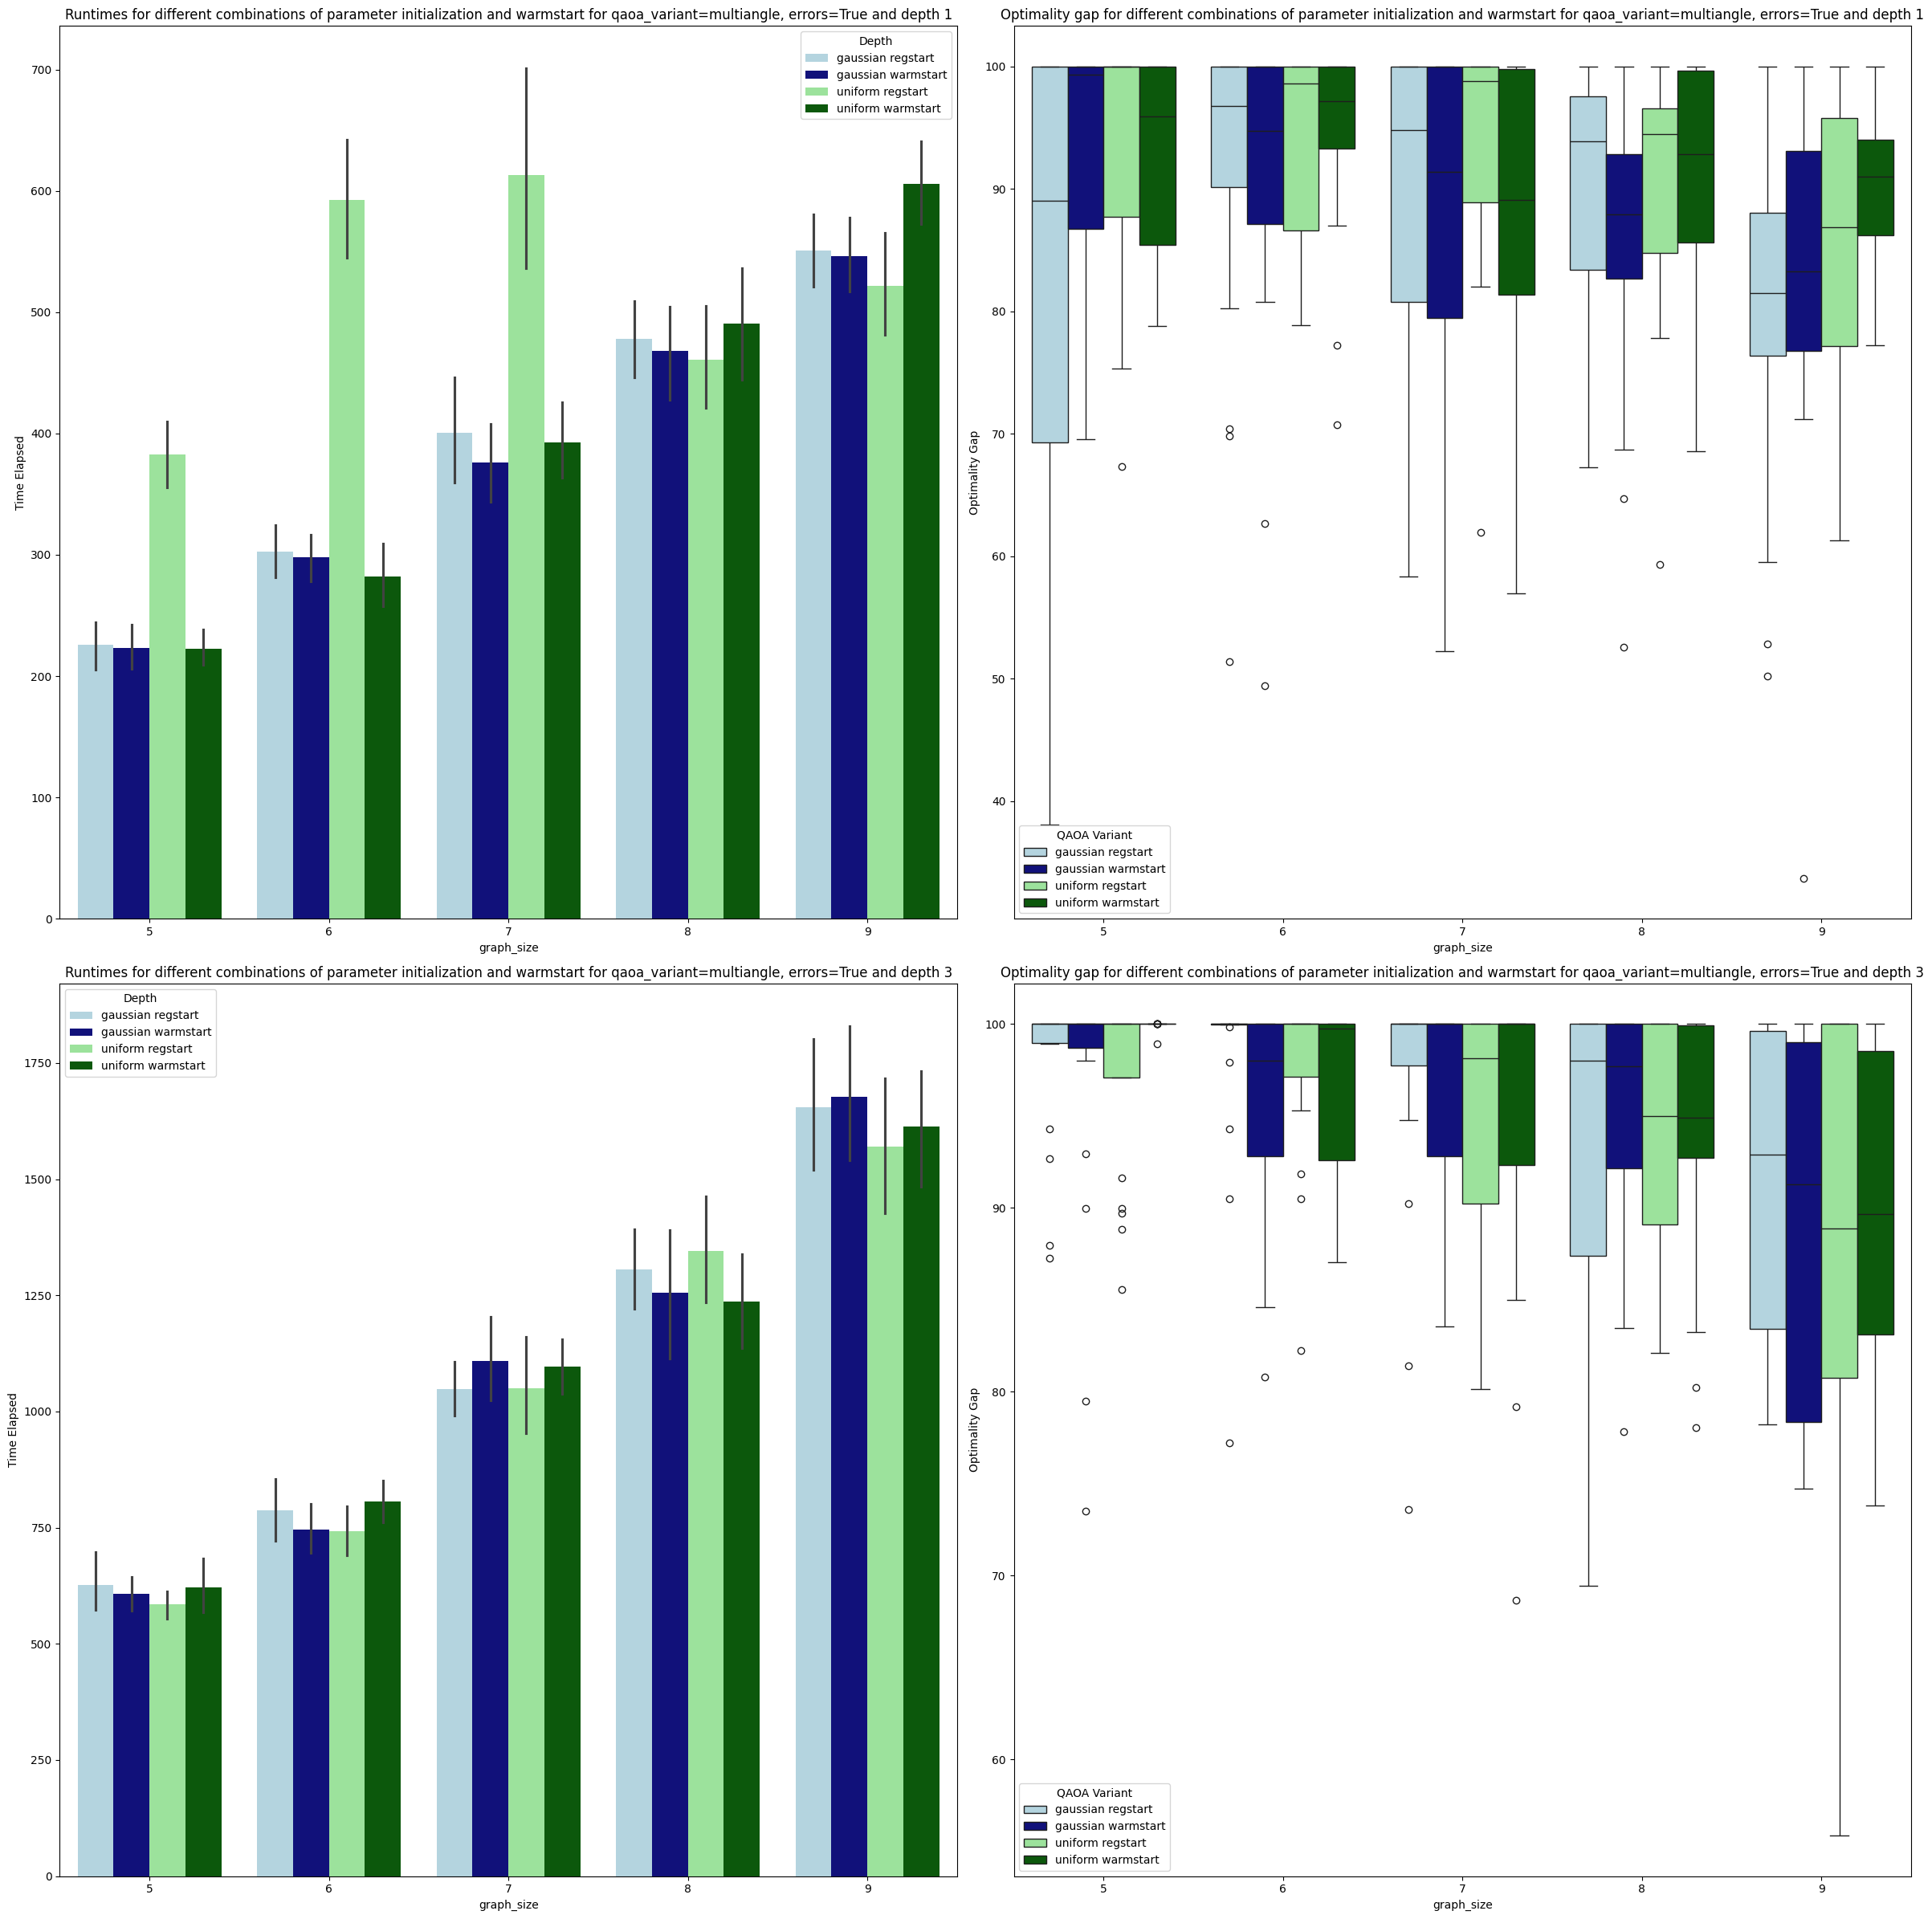

In [70]:
import seaborn as sns

import matplotlib.pyplot as plt

def warmstartconv(str):
    return 'warmstart' if str else 'regstart'
# Calculate the percent of optimal solution
combined_df['percent_optimal'] = (combined_df['quantum_obj_value'] / combined_df['classic_value']) * 100

combined_df['identifier'] = combined_df['param_initialization'] + ' '+ combined_df['warm_start'].apply(lambda x: warmstartconv(x)) 

def print_nice(df,filter_dict):
    filtered_df = df
    
    for column, value in filter_dict.items():
        filtered_df = filtered_df[filtered_df[column] == value]
    
    custom_colors = ['#ADD8E6', '#00008B', '#90EE90', '#006400']

    fig, axes = plt.subplots(2, 2, figsize=(24, 24))

    # Filter data for depth = 1
    depth_1_df = filtered_df[filtered_df['depth'] == 1]
    filter_str = ', '.join([f'{key}={value}' for key, value in filter_dict.items()])

    # Third plot
    sns.barplot(data=depth_1_df, x='graph_size', y='time_elapsed', hue='identifier', palette=custom_colors, ax=axes[0, 0])
    axes[0, 0].set_xlabel('graph_size')
    axes[0, 0].set_ylabel('Time Elapsed')
    axes[0, 0].set_title(f'Runtimes for different combinations of parameter initialization and warmstart for {filter_str} and depth 1')
    axes[0, 0].legend(title='Depth')

    # Fourth plot
    sns.boxplot(data=depth_1_df, x='graph_size', y='percent_optimal', hue='identifier', palette=custom_colors, ax=axes[0, 1])
    axes[0, 1].set_xlabel('graph_size')
    axes[0, 1].set_ylabel('Optimality Gap')
    axes[0, 1].set_title(f'Optimality gap for different combinations of parameter initialization and warmstart for {filter_str} and depth 1')
    axes[0, 1].legend(title='QAOA Variant')

    # Filter data for depth = 3
    depth_3_df = filtered_df[filtered_df['depth'] == 3]

    # Fifth plot
    sns.barplot(data=depth_3_df, x='graph_size', y='time_elapsed', hue='identifier', palette=custom_colors, ax=axes[1, 0])
    axes[1, 0].set_xlabel('graph_size')
    axes[1, 0].set_ylabel('Time Elapsed')
    axes[1, 0].set_title(f'Runtimes for different combinations of parameter initialization and warmstart for {filter_str} and depth 3')
    axes[1, 0].legend(title='Depth')

    # Sixth plot
    sns.boxplot(data=depth_3_df, x='graph_size', y='percent_optimal', hue='identifier', palette=custom_colors, ax=axes[1, 1])
    axes[1, 1].set_xlabel('graph_size')
    axes[1, 1].set_ylabel('Optimality Gap')
    axes[1, 1].set_title(f'Optimality gap for different combinations of parameter initialization and warmstart for {filter_str} and depth 3')
    axes[1, 1].legend(title='QAOA Variant')

    # Show the plots
    plt.tight_layout()
    plt.show()

print_nice(combined_df, {'qaoa_variant': 'multiangle', 'errors':True})


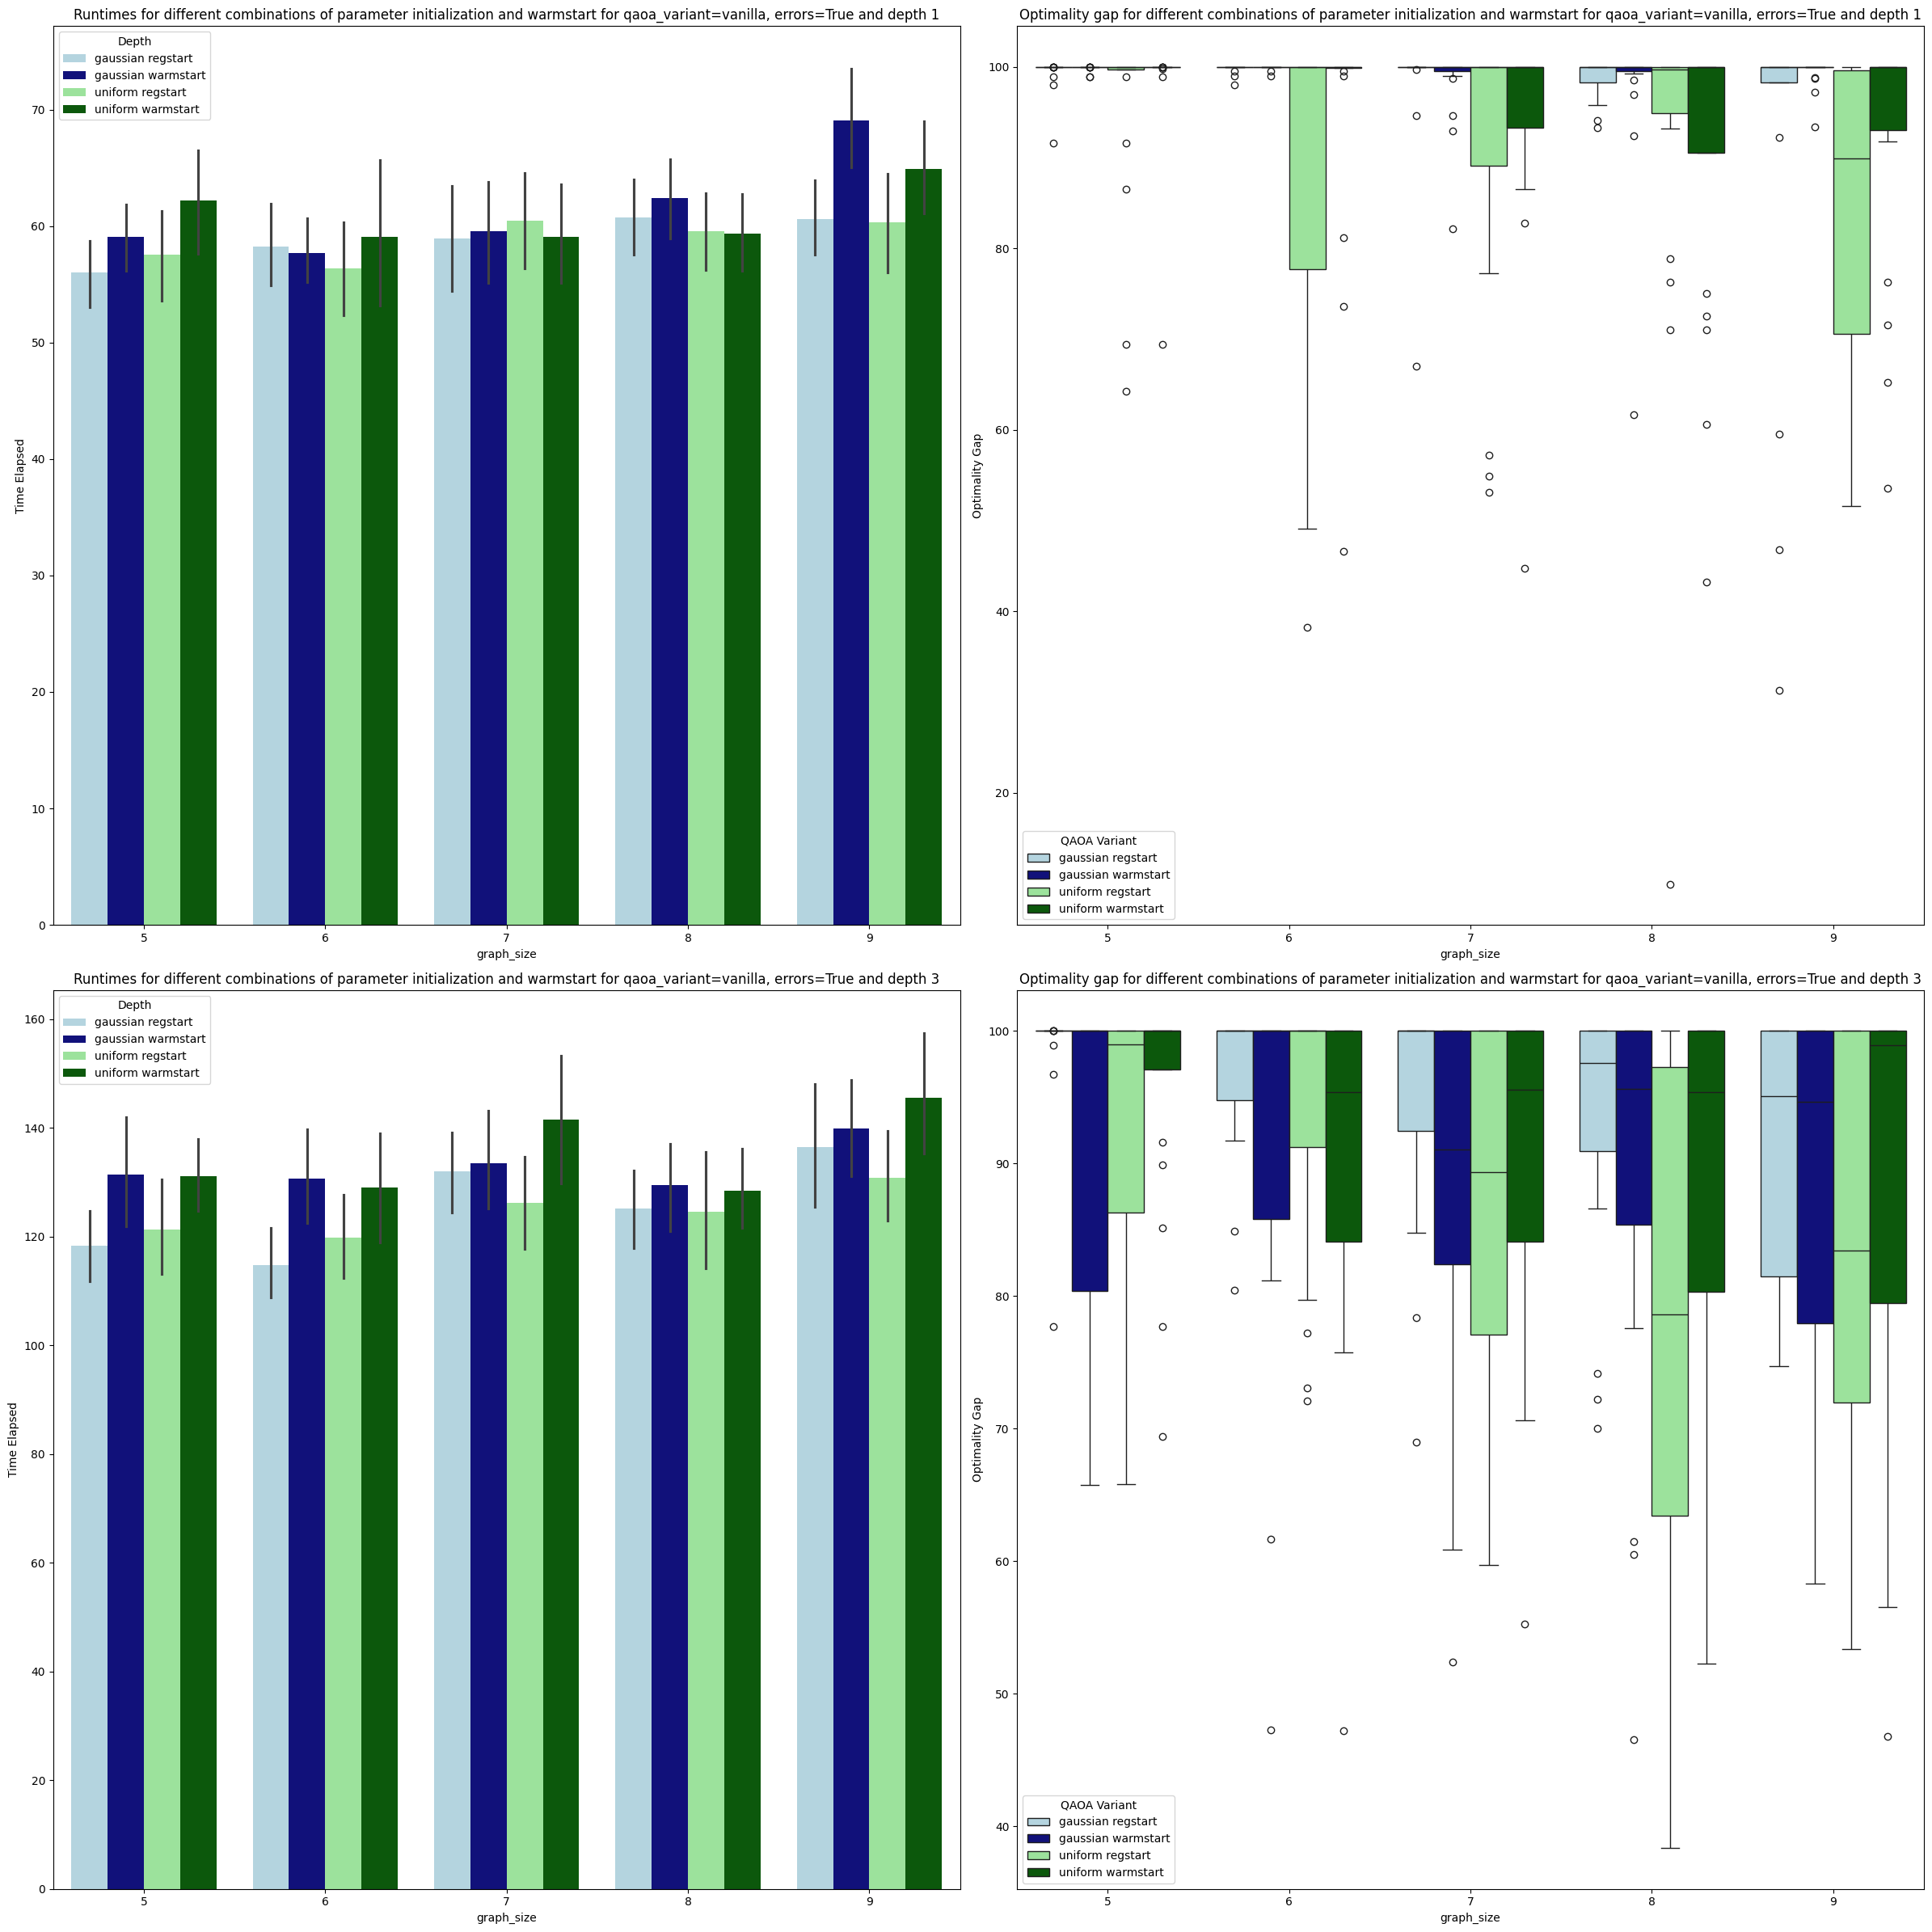

In [71]:
print_nice(combined_df,{'qaoa_variant': 'vanilla', 'errors':True})

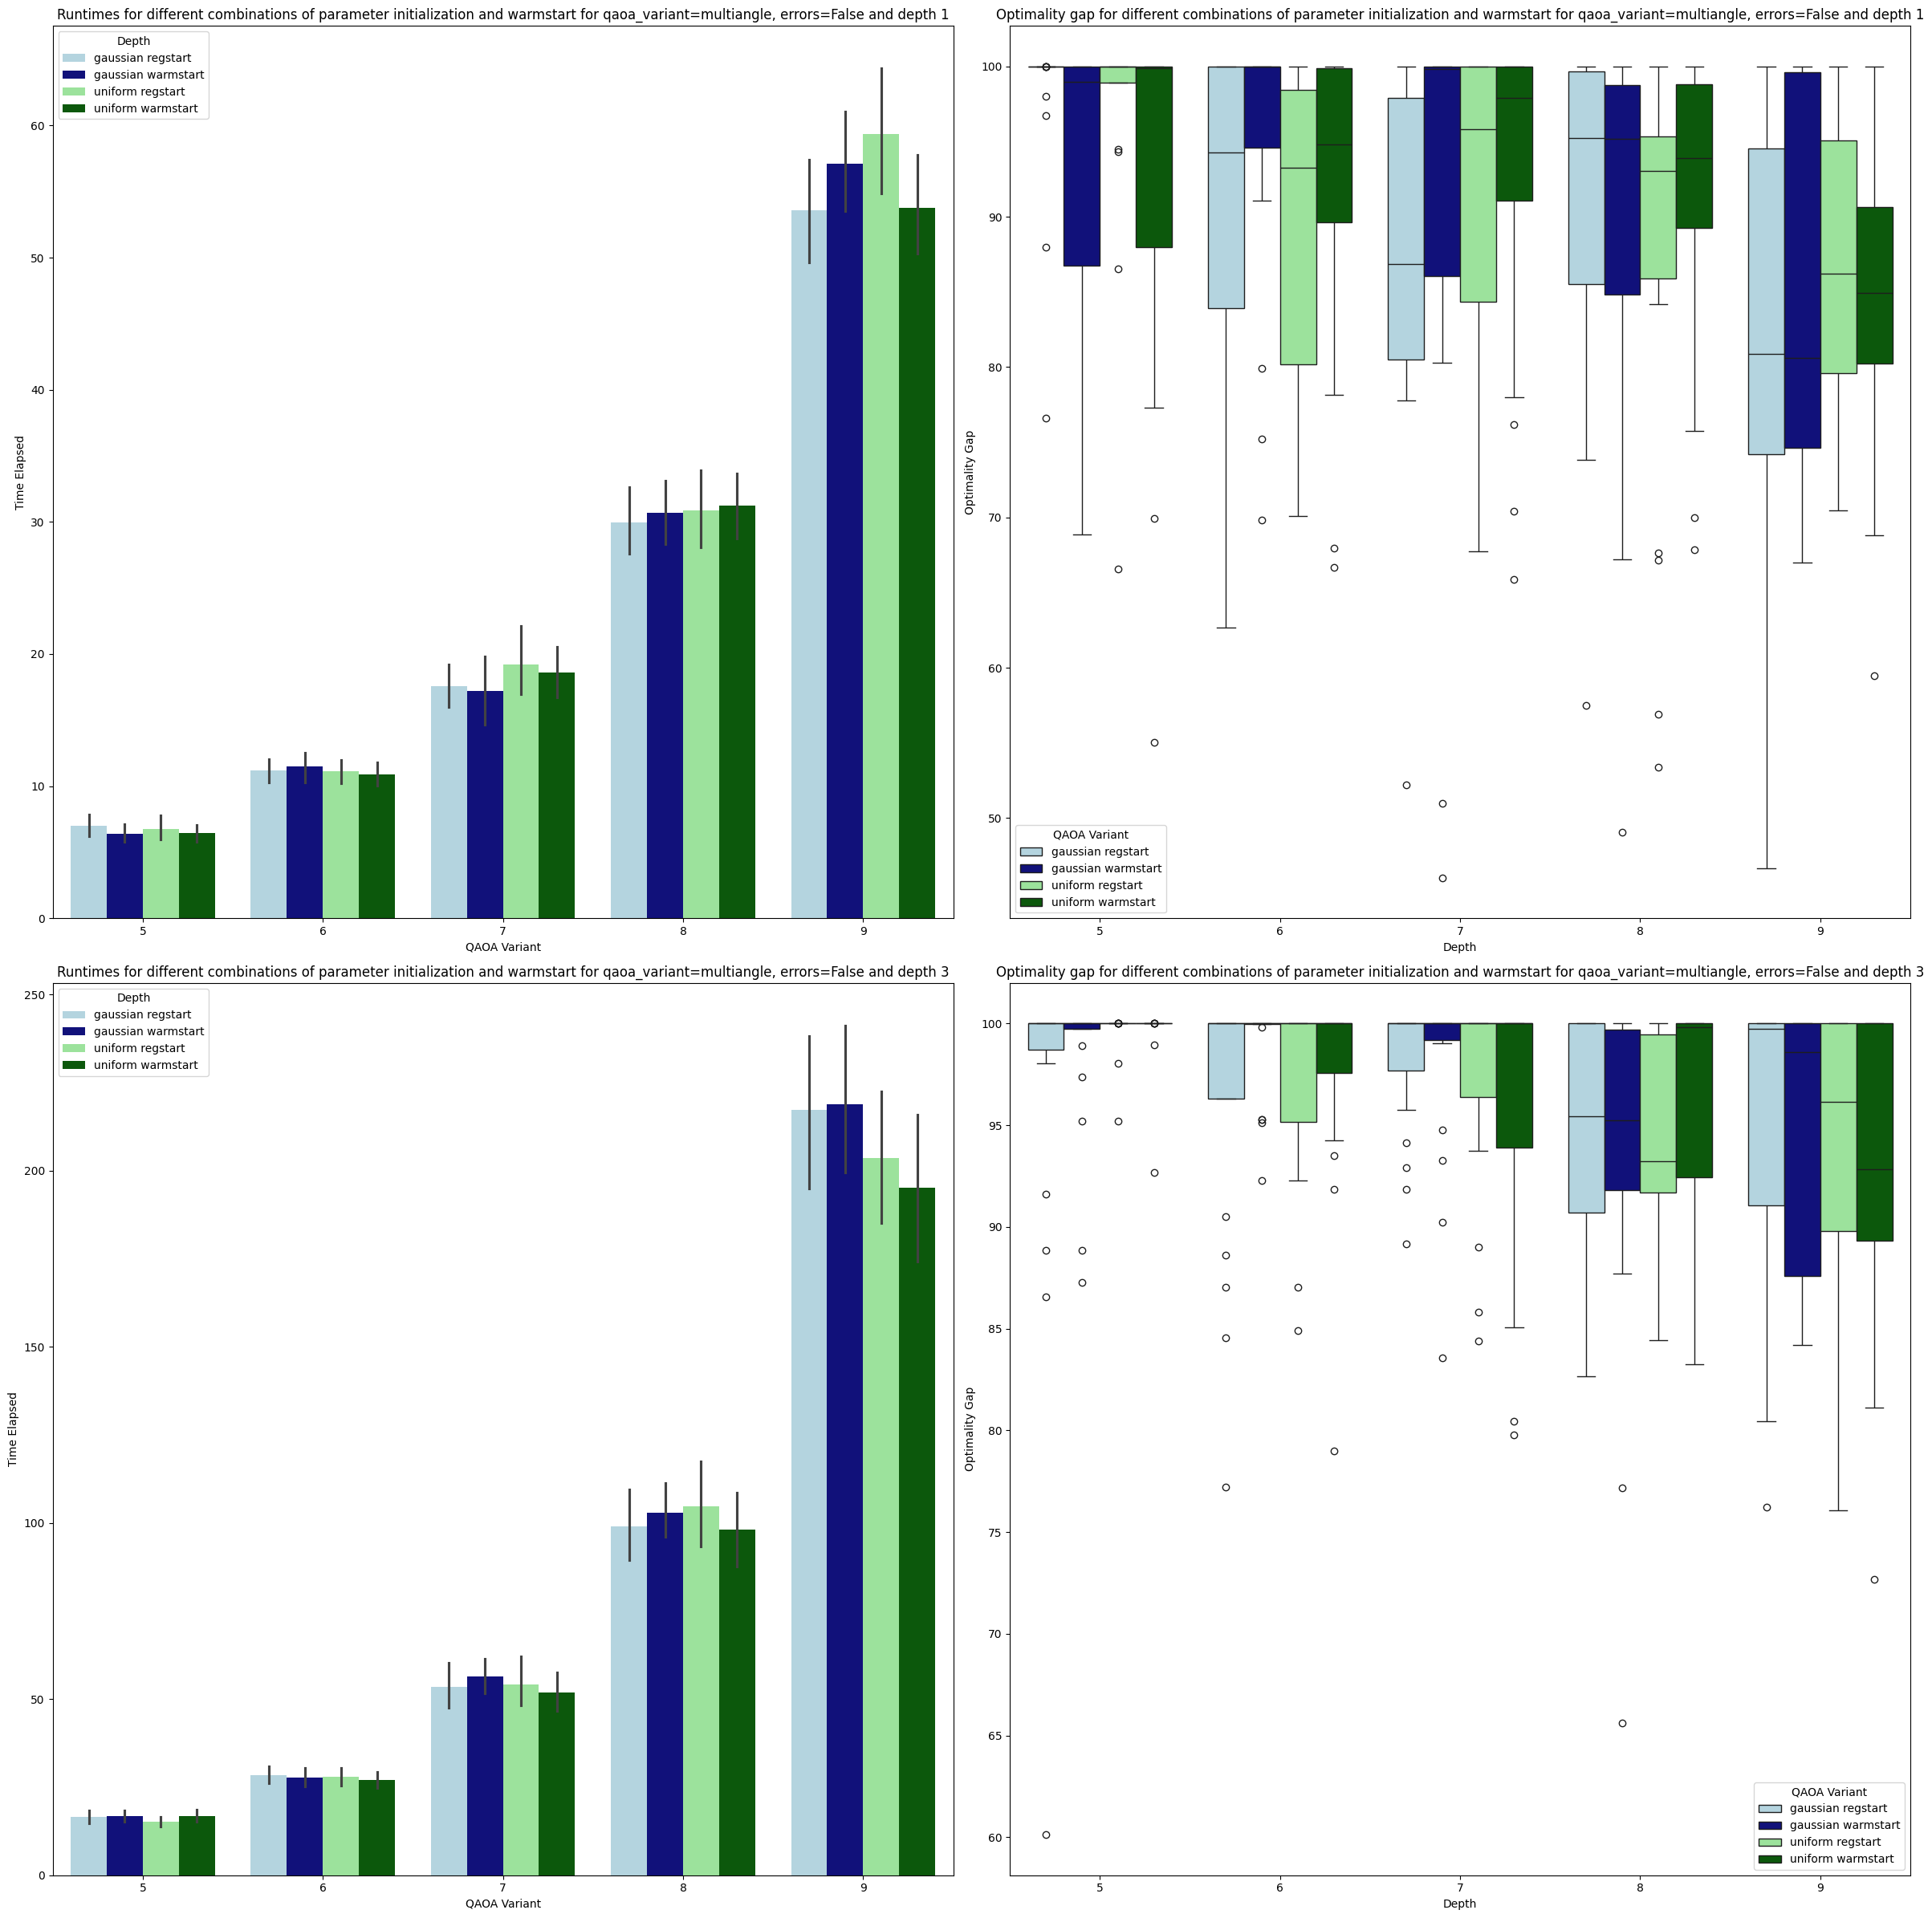

In [60]:
print_nice(combined_df,{'qaoa_variant': 'multiangle', 'errors':False})

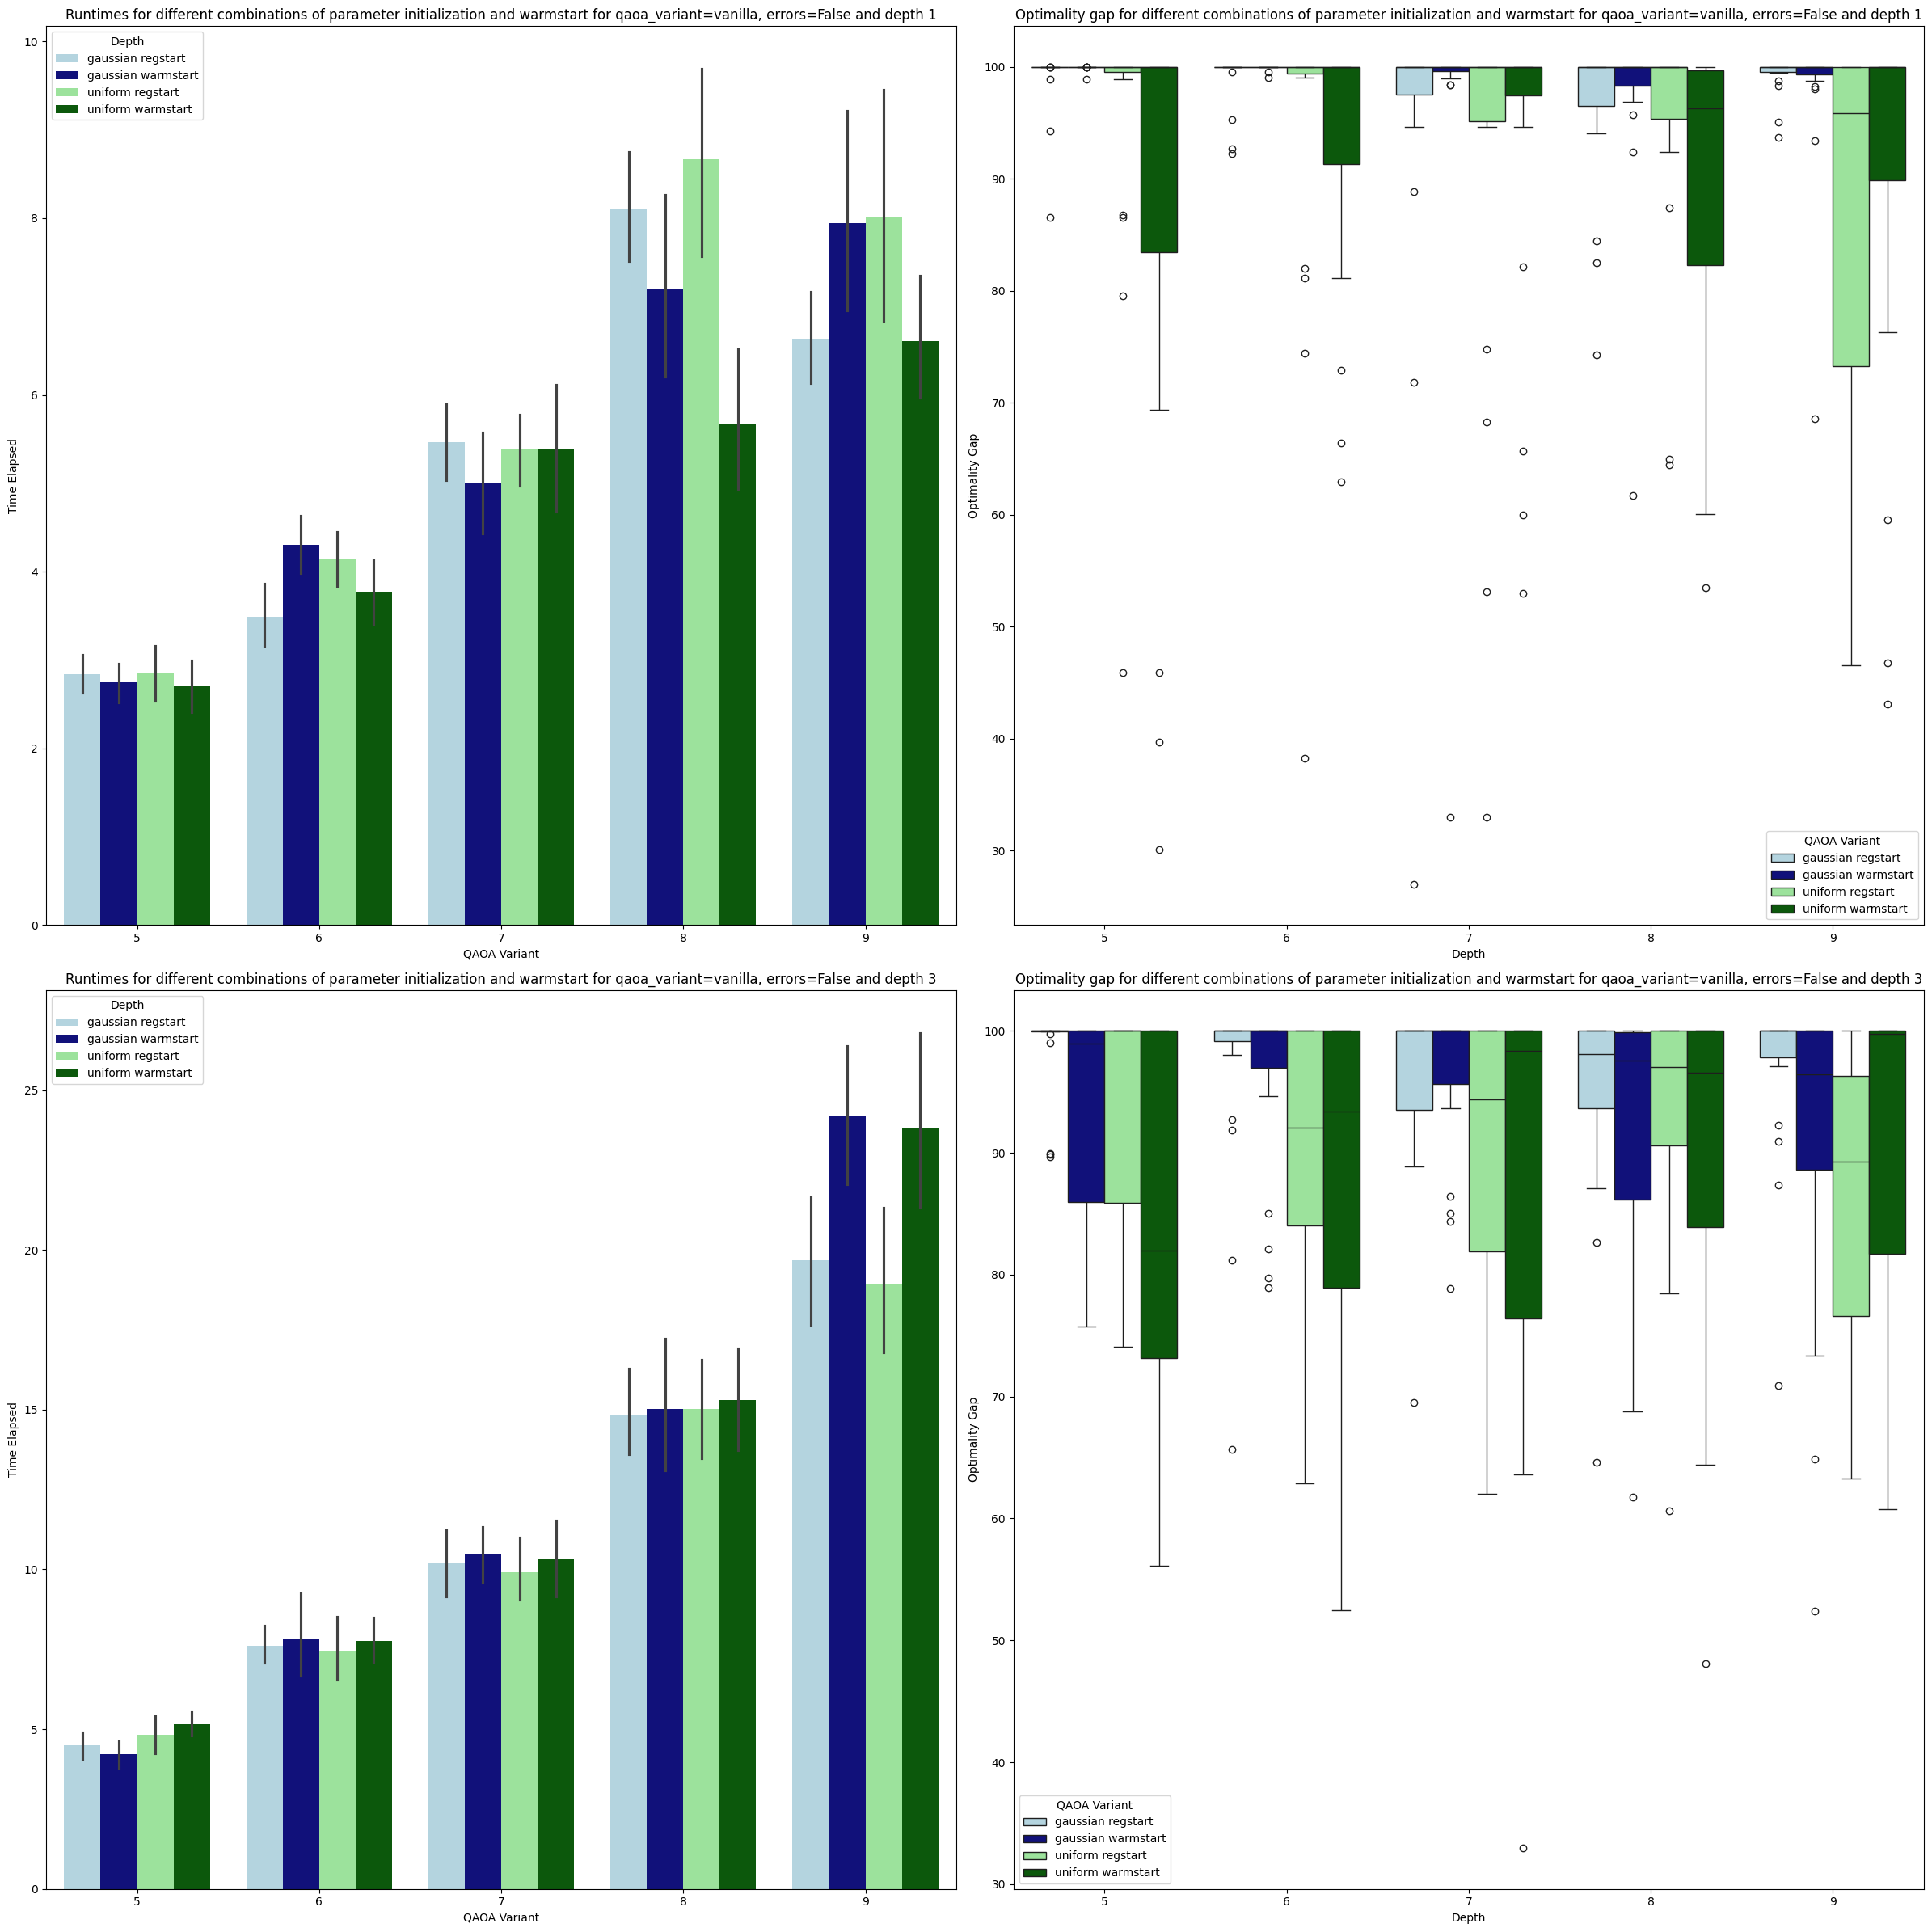

In [59]:
print_nice(combined_df,{'qaoa_variant': 'vanilla', 'errors':False})

In [68]:
# Group by 'identifier' and calculate the mean of 'percent_optimal'
error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'vanilla')]

error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))

aggregate_percent_optimal = error_df.groupby('identifier')['percent_optimal'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'Average Percent Optimal']

# Display the aggregate table
print('Vanilla',aggregate_percent_optimal)


error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'multiangle')]
error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))

aggregate_percent_optimal = error_df.groupby('identifier')['percent_optimal'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'Average Percent Optimal']

# Display the aggregate table
print('multiangle', aggregate_percent_optimal)

Vanilla             Identifier  Average Percent Optimal
0   gaussian regstart1                97.468648
1   gaussian regstart3                94.892773
2  gaussian warmstart1                99.002492
3  gaussian warmstart3                89.734737
4    uniform regstart1                89.800027
5    uniform regstart3                86.464019
6   uniform warmstart1                94.109341
7   uniform warmstart3                90.402183
multiangle             Identifier  Average Percent Optimal
0   gaussian regstart1                87.049980
1   gaussian regstart3                95.458297
2  gaussian warmstart1                87.500428
3  gaussian warmstart3                94.532759
4    uniform regstart1                91.349369
5    uniform regstart3                94.361105
6   uniform warmstart1                90.913654
7   uniform warmstart3                94.861628


C:\Users\torbjsme\AppData\Local\Temp\ipykernel_32340\1033221892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_32340\1033221892.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))


In [72]:
# Group by 'identifier' and calculate the mean of 'percent_optimal'
error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'vanilla')]

error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))

aggregate_percent_optimal = error_df.groupby('identifier')['quantum_func_evals'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'quantum_func_evals']

# Display the aggregate table
print('Vanilla',aggregate_percent_optimal)


error_df = combined_df[(combined_df['errors'] == True) & (combined_df['qaoa_variant'] == 'multiangle')]
error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))

aggregate_percent_optimal = error_df.groupby('identifier')['quantum_func_evals'].mean().reset_index()

# Rename the columns for clarity
aggregate_percent_optimal.columns = ['Identifier', 'quantum_func_evals']

# Display the aggregate table
print('multiangle', aggregate_percent_optimal)

Vanilla             Identifier  quantum_func_evals
0   gaussian regstart1               19.12
1   gaussian regstart3               40.20
2  gaussian warmstart1               20.28
3  gaussian warmstart3               43.15
4    uniform regstart1               19.12
5    uniform regstart3               40.23
6   uniform warmstart1               20.10
7   uniform warmstart3               43.52
multiangle             Identifier  quantum_func_evals
0   gaussian regstart1              130.83
1   gaussian regstart3              360.20
2  gaussian warmstart1              128.75
3  gaussian warmstart3              358.25
4    uniform regstart1              125.67
5    uniform regstart3              354.05
6   uniform warmstart1              132.96
7   uniform warmstart3              354.46


C:\Users\torbjsme\AppData\Local\Temp\ipykernel_32340\632280616.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))
C:\Users\torbjsme\AppData\Local\Temp\ipykernel_32340\632280616.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_df['identifier'] = error_df['identifier'] + error_df['depth'].apply(lambda x: str(x))
